<a href="https://colab.research.google.com/github/SriramyaK/Deep-Learning/blob/master/Dogs_Classifier_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#!unzip -uq "/content/drive/My Drive/Colab Notebooks/dogImages.zip" -d "/content/drive/My Drive/Colab Notebooks"

In [0]:
#!unzip -uq "/content/drive/My Drive/Colab Notebooks/dog-project/lfw.zip" -d "/content/drive/My Drive/Colab Notebooks/dog-project/"

In [0]:
#!cd "/content/drive/My Drive/Colab Notebooks/dog-project/haarcascades"

In [5]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras 

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('/content/drive/My Drive/Colab Notebooks/dog-project/dogImages/train')
valid_files, valid_targets = load_dataset('/content/drive/My Drive/Colab Notebooks/dog-project/dogImages/valid')
test_files, test_targets = load_dataset('/content/drive/My Drive/Colab Notebooks/dog-project/dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("/content/drive/My Drive/Colab Notebooks/dog-project/dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [6]:
import random
random.seed(8675309)

human_files = np.array(glob('/content/drive/My Drive/Colab Notebooks/dog-project/lfw/*/*'))
random.shuffle(human_files)
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


In [7]:
human_files[3]

'/content/drive/My Drive/Colab Notebooks/dog-project/lfw/Lauren_Hutton/Lauren_Hutton_0001.jpg'

Number of faces detected: 1


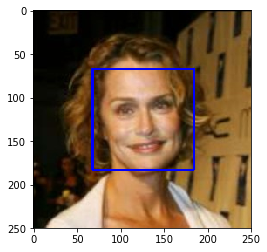

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/dog-project/haarcascades/haarcascade_frontalface_alt.xml')
img = cv2.imread(human_files[3])
gray = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray)
print('Number of faces detected:', len(faces))

for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [0]:
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [10]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## TODO: Test the performance of the face_detector algorithm 
num_trues_1 = 0
for i in human_files_short:
    pred = face_detector(i)
    if pred == True:
        num_trues_1 = num_trues_1+1

num_trues_2 = 0
for i in dog_files_short:
    pred = face_detector(i)
    if pred == True:
        num_trues_2 = num_trues_2+1
## on the images in human_files_short and dog_files_short.

print ("Percentage of detected human faces in first 100 human_files is %f" % ((num_trues_1/100)*100))
print ("Percentage of detected human faces in first 100 dog_files is %f" % ((num_trues_2/100)*100))

Percentage of detected human faces in first 100 human_files is 98.000000
Percentage of detected human faces in first 100 dog_files is 12.000000


In [11]:
'''dnnFaceDetector = dlib.cnn_face_detection_model_v1("./mmod_human_face_detector.dat")
faceRects = dnnFaceDetector(frameDlibHogSmall, 0)
for faceRect in faceRects:
    x1 = faceRect.rect.left()
    y1 = faceRect.rect.top()
    x2 = faceRect.rect.right()
    y2 = faceRect.rect.bottom()'''

'dnnFaceDetector = dlib.cnn_face_detection_model_v1("./mmod_human_face_detector.dat")\nfaceRects = dnnFaceDetector(frameDlibHogSmall, 0)\nfor faceRect in faceRects:\n    x1 = faceRect.rect.left()\n    y1 = faceRect.rect.top()\n    x2 = faceRect.rect.right()\n    y2 = faceRect.rect.bottom()'

In [12]:
from keras.applications.resnet50 import ResNet50
ResNet_model = ResNet50(weights='imagenet')
print('resnet imported..')

W0628 00:31:30.608068 140206357174144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 00:31:30.635448 140206357174144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 00:31:30.641639 140206357174144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0628 00:31:30.666599 140206357174144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0628 00:31:30.667522

resnet imported..


In [0]:
from keras.preprocessing import image  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [14]:
from keras.applications.resnet50 import preprocess_input, decode_predictions
print("libraries from resnet imported..")

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet_model.predict(img))

libraries from resnet imported..


In [0]:
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

In [16]:
### on the images in human_files_short and dog_files_short.

num_trues_1 = 0
for i in human_files_short:
    pred = dog_detector(i)
    if pred == True:
        num_trues_1 = num_trues_1+1
        
print("human files processed..")
num_trues_2 = 0
for i in dog_files_short:
    pred = dog_detector(i)
    if pred == True:
        num_trues_2 = num_trues_2+1
## on the images in human_files_short and dog_files_short.

print ("Percentage of detected dogs in first 100 human_files is %f" % ((num_trues_1/100)*100))
print ("Percentage of detected dogs in first 100 dog_files is %f" % ((num_trues_2/100)*100))

human files processed..
Percentage of detected dogs in first 100 human_files is 0.000000
Percentage of detected dogs in first 100 dog_files is 100.000000


In [17]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:08<00:00, 137.14it/s]


In [18]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer="uniform"))
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu', kernel_initializer="uniform"))
model.add(Dropout(0.4))

model.add(Dense(133, activation='softmax'))

model.summary()

W0628 00:33:24.637454 140206357174144 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               11944064  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [19]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

W0628 00:33:24.715453 140206357174144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [20]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 50

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

W0628 00:33:24.911739 140206357174144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 6680 samples, validate on 835 samples
Epoch 1/50
6680/6680 [==============================] - 15s 2ms/step - loss: 4.9011 - acc: 0.0102 - val_loss: 4.8834 - val_acc: 0.0108

Epoch 00001: val_loss improved from inf to 4.88343, saving model to /content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best.from_scratch.hdf5
Epoch 2/50
6680/6680 [==============================] - 13s 2ms/step - loss: 4.8851 - acc: 0.0117 - val_loss: 4.8424 - val_acc: 0.0096

Epoch 00002: val_loss improved from 4.88343 to 4.84241, saving model to /content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best.from_scratch.hdf5
Epoch 3/50
6680/6680 [==============================] - 13s 2ms/step - loss: 4.8345 - acc: 0.0150 - val_loss: 4.8163 - val_acc: 0.0132

Epoch 00003: val_loss improved from 4.84241 to 4.81626, saving model to /content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best.from_scratch.hdf5
Epoch 4/50
6680/6680 [=======================

In [0]:
model.load_weights('/content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best.from_scratch.hdf5')

In [22]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 5.6220%


In [0]:
bottleneck_features = np.load('/content/drive/My Drive/Colab Notebooks/dog-project/bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

In [24]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


In [0]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [26]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s 324us/step - loss: 11.3680 - acc: 0.1536 - val_loss: 9.5801 - val_acc: 0.2719

Epoch 00001: val_loss improved from inf to 9.58011, saving model to /content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best.VGG16.hdf5
Epoch 2/20
6680/6680 [==============================] - 1s 205us/step - loss: 8.5393 - acc: 0.3392 - val_loss: 8.5092 - val_acc: 0.3341

Epoch 00002: val_loss improved from 9.58011 to 8.50923, saving model to /content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best.VGG16.hdf5
Epoch 3/20
6680/6680 [==============================] - 1s 208us/step - loss: 7.6787 - acc: 0.4331 - val_loss: 7.9273 - val_acc: 0.3701

Epoch 00003: val_loss improved from 8.50923 to 7.92731, saving model to /content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best.VGG16.hdf5
Epoch 4/20
6680/6680 [==============================] - 1s 205

In [0]:
VGG16_model.load_weights('/content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best.VGG16.hdf5')

In [28]:
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 52.6316%


In [0]:
bottleneck_features = np.load('/content/drive/My Drive/Colab Notebooks/dog-project/bottleneck_features/DogResnet50Data.npz')
train_RESNET50 = bottleneck_features['train']
valid_RESNET50 = bottleneck_features['valid']
test_RESNET50 = bottleneck_features['test']

In [32]:
from keras.layers import Dropout

modelTransfer = Sequential()
modelTransfer.add(GlobalAveragePooling2D(input_shape=train_RESNET50.shape[1:]))
modelTransfer.add(Dense(400, activation='relu'))
modelTransfer.add(Dropout(0.2))
modelTransfer.add(Dense(200, activation='relu'))
modelTransfer.add(Dropout(0.2))
modelTransfer.add(Dense(133, activation='softmax'))

modelTransfer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 400)               819600    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 133)               26733     
Total params: 926,533
Trainable params: 926,533
Non-trainable params: 0
_________________________________________________________________


In [0]:
modelTransfer.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [34]:
from keras.callbacks import ModelCheckpoint 

checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best4.RESNET50.hdf5', 
                               verbose=1, save_best_only=True)

modelTransfer.fit(train_RESNET50, train_targets, 
          validation_data=(valid_RESNET50, valid_targets),
          epochs=30, batch_size=128, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/30
6680/6680 [==============================] - 1s 180us/step - loss: 3.1975 - acc: 0.2847 - val_loss: 1.7204 - val_acc: 0.5521

Epoch 00001: val_loss improved from inf to 1.72036, saving model to /content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best4.RESNET50.hdf5
Epoch 2/30
6680/6680 [==============================] - 0s 41us/step - loss: 1.3669 - acc: 0.6073 - val_loss: 1.0497 - val_acc: 0.6850

Epoch 00002: val_loss improved from 1.72036 to 1.04972, saving model to /content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best4.RESNET50.hdf5
Epoch 3/30
6680/6680 [==============================] - 0s 40us/step - loss: 0.8931 - acc: 0.7274 - val_loss: 1.0231 - val_acc: 0.6910

Epoch 00003: val_loss improved from 1.04972 to 1.02313, saving model to /content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best4.RESNET50.hdf5
Epoch 4/30
6680/6680 [==============================]

In [0]:
modelTransfer.load_weights('/content/drive/My Drive/Colab Notebooks/dog-project/saved_models/weights.best4.RESNET50.hdf5')

In [40]:
pred = [np.argmax(modelTransfer.predict(np.expand_dims(feature, axis=0))) for feature in test_RESNET50]
accuracy = 100*np.sum(np.array(pred)==np.argmax(test_targets, axis=1))/len(pred)
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 80.7416%
